# Assignment #3

In order to best advise the bank’s management it was first necessary to frame the problem, get the data, explore the data, and prepare the data before evaluating different machine learning classification models. Time was spent with the bank’s management team and it was understood that the goal of this work was to create a model that can accurately predict clients that are most likely to subscribe to new term deposits by looking at their default, housing, and loan attributes from prior marketing campaigns. Once the data was collected, it was first inspected to detect any missing values; none were found. Then the entire dataset was explored to get an understanding of the univariate distributions and bivariate relationships that existed within the available records. Following these initial EDA steps, the features and labels of interest were isolated. Further probing of the relationships between these categorical variables was conducted by way of stacked bar charts, grouping, and heat maps. Finally, the categorical data was mapped to reflect binary data and data arrays were created to facilitate the use of Scikit Learn models.

While conducting this research the primary classification models evaluated were Logistic Regression and Naive Bayes. Both of these models were evaluated within a cross-validation design. The area under the receiver operating curve (ROC AUC) was used as the primary index of classification model performance. In addition to these primary techniques, evaluation tools like the confusion matrix and precision recall curves were also utilized to characterize each model. Secondary performance metrics such as precision, recall, and accuracy were incorporated as well.

It was found that Logistic Regression best met the objectives of the bank’s stakeholders. The parameters of this model consist of setting the class_weight to balanced, C equal to 1, a penalty of l1, and using the liblinear solver. This model had a mean and standard deviation ROC AUC of 0.604 and 0.0213 when evaluated with cross-validation on the training data. When this model was evaluated on the test data, the ROC AUC score was 0.579 with a precision and recall of 15.6% and 53.1%, respectively. This model showed the highest and most consistent ROC AUC scores of those evaluated while generalizing the best when the test data was predicted. 

When compared to the Logistic Regression model, Naive Bayes struggled from overfitting the test data. When the training data set was evaluated via cross-validation, Naive Bayes had a mean and standard deviation ROC AUC of 0.605 and 0.0241. However, when tested the ROC AUC score dropped significantly to 0.493 with a precision and recall of 13.7% and 1.7%, respectively. This is worse than a purely random classifier. Naive Bayes also was negatively impacted from a stratified split of the original dataset when making training and test data sets. The Naive Bayes model fell short in its lack of hyperparameters that could be adjusted to improve model performance. For instance, the default Logistic Regression model had a mean and standard deviation ROC AUC score of 0.601 and 0.0356 and poorly generalized. This was largely because the model failed to predict any positive responses, something the Naive Bayes accomplished. But the Logistic Regression model was improved by weighting classes and from a stratified data split. 

For future marketing campaigns, it is recommended that clients without a house loan, personal loan or credit in default should be targeted. Clients responding no to all three attributes will be most likely to subscribe to new term deposits at the bank. In particular clients without house loans showed a disproportionate positive response rate for subscribing to a new term deposit. This was identified both from grouping the data and calculating response proportions and by evaluating clients with the highest decision function scores from the Logistic Regression model. However, the utility of these three features alone was weak in predicting a positive response rate. For instance, 98.3% of the respondents have not defaulted on their credit. The proportion of clients that responded yes to a new term deposit was identical to that of clients that responded no to a new term deposit whether or not they had credit in default. So the default attribute had very low predictive value. These three features struggled to predict positive responses which is clearly reflected in the low ROC AUC scores for the models.

Future work should focus on incorporating more features as inputs to the classifiers. It was shown that simply including the other categorical variables provided in the raw data could help improve the Logistic Regression ROC AUC score to 0.7. Additionally, classifiers such as Decision Trees, K-Nearest Neighbors and Support Vector Machines should also be evaluated in future research.


# Appendix

## Frame the Problem:

A Portugese bank completed 17 telephone marketing campaigns between May 2008 - November 2020. During these campaigns client information was collected. The goal of this study is to identify clients most likely to subscribe to new term deposits. This will be done by using 3 binary variables related to the client banking history: default, housing, loan.

## Get the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [4]:
#Set random seed
seed = 42

In [5]:
#Read in data:
bank = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 3/jump-start-bank-v003/bank.csv", sep = ";")

## Explore the data to gain insights:

In [6]:
#Look at the head of the data:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome response  
0  cellular   19   oct        79         1     -1         0  unknown       no  
1  cellular   11   may       220         1    339         4  failure       no  
2  cellular   16   apr       185         1    330         1  failure       no  
3   unknown    3   jun       199         4     -1         0  unknown       no  
4   unknown    5   may       226         1     -1         0  unknown       no

In [7]:
#Look at initial dataset info:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


We notice no missing values here. So don't need to consider imputations at this time. 

In [8]:
#Look at the shape of the current dataset:
print(bank.shape)

(4521, 17)


In [9]:
sns.pairplot(bank)
plt.show()

In [10]:
#Let's subset the dataframe and start looking at the features of interest:
df = bank[['default','housing','loan','response']]
df.head()

default housing loan response
0      no      no   no       no
1      no     yes  yes       no
2      no     yes   no       no
3      no     yes  yes       no
4      no     yes   no       no

In [11]:
#Look at the new dataframe shape:
print(df.shape)

(4521, 4)


In [12]:
#Look at the amount of yes/no input for each feature and the response variable:
print("default:\n",df["default"].value_counts(),"\n")
print("housing:\n",df['housing'].value_counts(),"\n")
print("loan:\n",df['loan'].value_counts(),"\n")
print("response:\n",df['response'].value_counts())

default:
 no     4445
yes      76
Name: default, dtype: int64 

housing:
 yes    2559
no     1962
Name: housing, dtype: int64 

loan:
 no     3830
yes     691
Name: loan, dtype: int64 

response:
 no     4000
yes     521
Name: response, dtype: int64


In [13]:
# Check the frequency of "default", "loan" and "housing" by "response":
pd.crosstab([bank['default'], bank['loan'], bank['housing']],[bank['response']], margins = True)

response                no  yes   All
default loan housing                 
no      no   no       1381  279  1660
             yes      1927  192  2119
        yes  no        255   16   271
             yes       370   25   395
yes     no   no         13    4    17
             yes        31    3    34
        yes  no         12    2    14
             yes        11    0    11
All                   4000  521  4521

In [14]:
#Let's look at the frequency of feature by response
#first define function to print frequency table and plot figure:
def FeatureVsResponse(feature):
    ct = pd.crosstab([bank['response']],[bank['{}'.format(feature)]], margins = False)
    print(ct)
    plt.figure()
    ct.plot.bar(stacked = True)
    plt.legend()
    plt.title("{} vs. response".format(feature))
    plt.show();

default     no  yes
response           
no        3933   67
yes        512    9


<Figure size 432x288 with 0 Axes>

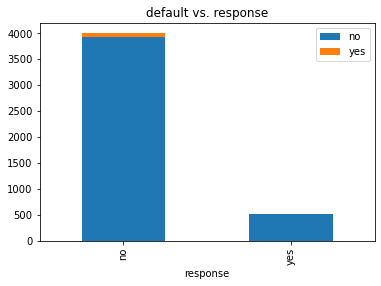

loan        no  yes
response           
no        3352  648
yes        478   43


<Figure size 432x288 with 0 Axes>

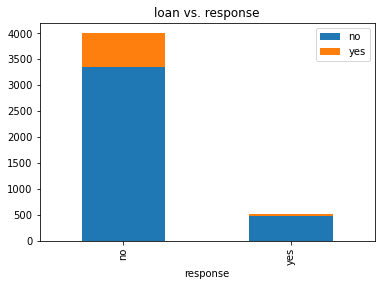

housing     no   yes
response            
no        1661  2339
yes        301   220


<Figure size 432x288 with 0 Axes>

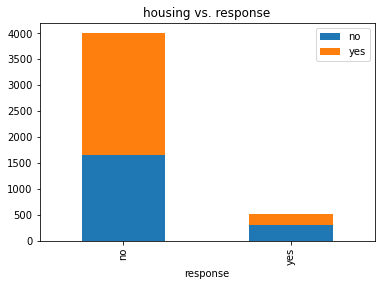

In [15]:
feature_list = ['default','loan','housing']
for i in feature_list:
    FeatureVsResponse(i)

What we learn from this information is that default is likely a poor indicator of response here. Nearly all customers indicate default is no. Of the customers who did not default 11.5% had a response yes. Of the customers who did default 11.8% had a response yes. So default will likely be a poor predictator of if the customers subscribed to new term deposits.

Loan and housing seem to be better indicators of subscribing to new term deposits. Customers who were negative on loans were twice as likely to subsribe to new term deposits compared to customers that where positive on loans. Similarly, customers who were negative on housing where twice as likely to subscribe to new term deposits compared to customers that where positive on housing.

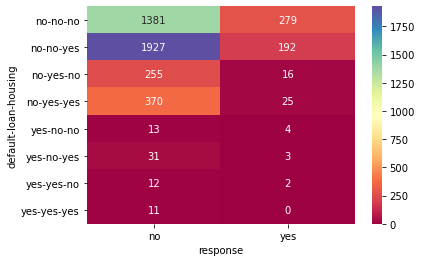

In [16]:
ct_nm = pd.crosstab([bank['default'],bank['loan'],bank['housing']],
                   [bank['response']], margins = False)
plt.figure()
sns.heatmap(ct_nm, cmap = "Spectral", annot = True, cbar = True, fmt = 'g');

This is an interesting graphic. By count, it appears that when all features are negative, there is a relatively high probability that the customers will subsribe to new term deposits. However, there are some situations, like default = yes - loan = no - housing = no where there is too little detail to tell if a trend is real or not. In this situation, 23.5% of these customers subscribed to new term deposits, but I am skeptical if there is enough data there to generate a meaningful trend. The general trend appears that accumulating more negative feature responses, especially when it comes to housing, the more likely a customer is to subsribe to a new term deposit.

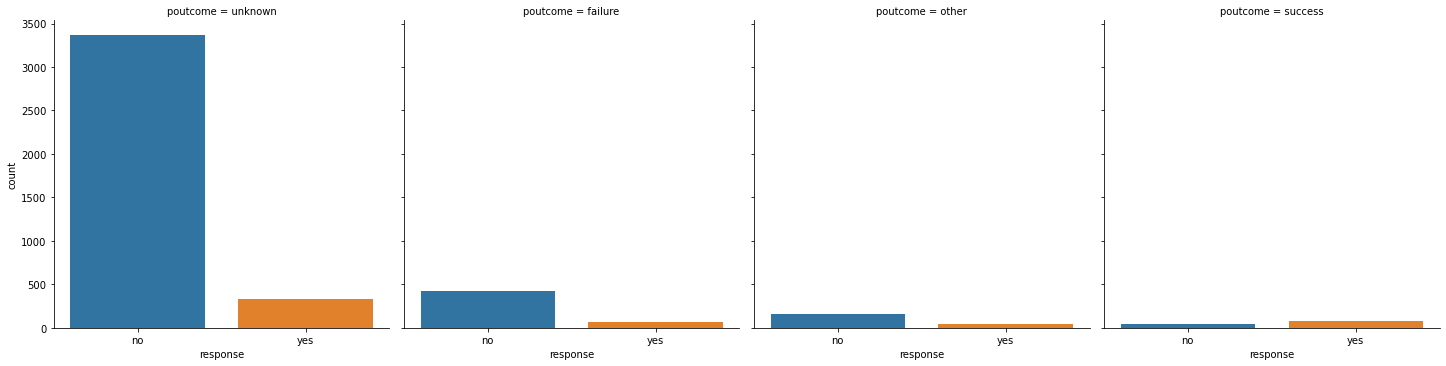

In [17]:
sns.catplot(x = "response", col = "poutcome", data = bank, kind = "count")
plt.show();

## Prepare the data to better expose the underlying data patterns to Machine Learning Algorithms

In [18]:
#Convert yes no strings to binary inputs:
df = bank[['default','housing','loan','response']]

convert_to_binary = {'no' : 0, 'yes' : 1}

for i in df.columns:
    df['{}'.format(i)] = df['{}'.format(i)].map(convert_to_binary)

df.head()

default  housing  loan  response
0        0        0     0         0
1        0        1     1         0
2        0        1     0         0
3        0        1     1         0
4        0        1     0         0

In [19]:
df.groupby("default").agg({"response":np.mean})

response
default          
0        0.115186
1        0.118421

In [20]:
df.groupby("housing").agg({"response":np.mean})

response
housing          
0        0.153415
1        0.085971

In [21]:
df.groupby("loan").agg({"response":np.mean})

response
loan          
0     0.124804
1     0.062229

In [22]:
#Convert data from Pandas to np.array to get data into for that ML algorithms will take:
bank_array = np.array([np.array(df.default), np.array(df.housing), np.array(df.loan), np.array(df.response)]).T
print(bank_array.shape)

(4521, 4)


In [23]:
#Split out your features into X and labels into y:
X = bank_array[:,0:3]
y = bank_array[:,3]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4521, 3)
y shape: (4521,)


In [24]:
X[0:5,:]

array([[0, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 0]])

In [25]:
y[0:5]

array([0, 0, 0, 0, 0])

In [26]:
#Split the data into training datasets and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

Note, have not scaled my data because it is binary. May come back later and see what the impact of scaling will be on the data!

## Explore many different models and shortlist the best ones

### No Scale; Logistic Regression:

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#First consider accuracy as a performance metric:

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.89


In [28]:
#Now use cross validation to evaluate the accuracy performance of LogisticRegression:
logreg = LogisticRegression()
cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "accuracy")

array([0.88348083, 0.88348083, 0.88348083, 0.88348083, 0.8820059 ])

These values appear to be pretty high. We know that our data set has 521 positive responders and 4000 negative responders. This results in 88.5% of customers with a no response. So it is likely that the LogisticRegression model is just saying no to everything and getting close to 88.5% accuracy. Which is not bad, but not the best performance measure.

In [29]:
logreg = LogisticRegression()
y_train_pred = cross_val_predict(logreg, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[2994,    0],
       [ 396,    0]])

The confusion matrix confirms my suspicions. The model is just predicting every customer to respond no to a new term deposit. This is not a useful model for trying to guide future marketing campaigns. It is essentially telling you what is the point, everyone will just say no!

In [30]:
#Now let's look at the precision and recall for this model:
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("F1: ", f1_score(y_train, y_train_pred))

Precision:  0.0
Recall:  0.0
F1:  0.0


Because there are no True Positives, precision and recall are both 0. This is clearly a suboptimal model.

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="best", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([min(thresholds), max(thresholds), 0, 1])             

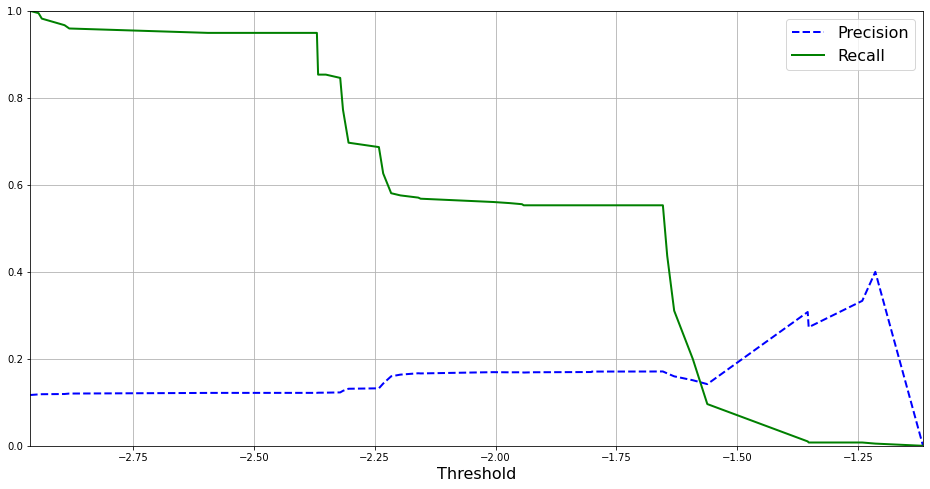

In [32]:
#Now let's generate a precision recall curve to figure out what decision threshold 
#will help us lead to an improved model
logreg = LogisticRegression()
y_scores = cross_val_predict(logreg, X_train, y_train, cv = 5, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

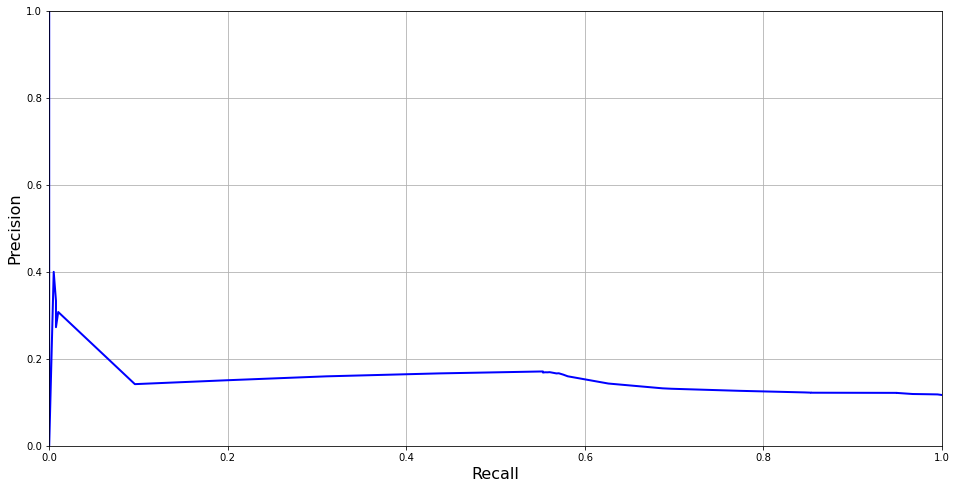

In [34]:
plt.figure(figsize = (16,8))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Clearly this model is quite poor. Our precision is never better than 0.4 regardless of the threshold. This means that even at the best threshold, whenever our model predicts a customer will subsribe to a new term deposit, it will only be right 40% of the time. 

This is a good time to point out that we are probably most interested in the postive cases here. The marketing campaigns are largely unsuccessful. The goal here will be to maximize the number of new term deposit subscribers from our base rate of around 11%. 

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)   

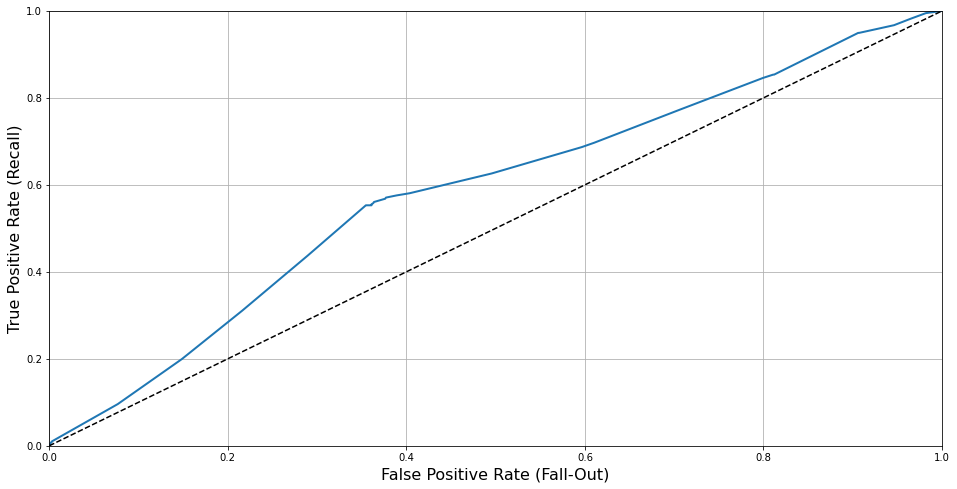

Area Under ROC Curve:  0.58355


In [36]:
#Now look at the ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores),5))

In [37]:
#Evaluate the model on test data:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("ROC AUC Test:", round(roc_auc_score(y_test, y_test_pred),5))

Confusion Matrix: 
 [[1006    0]
 [ 125    0]]
ROC AUC Test: 0.5


In [38]:
#Try cross-validating the method with roc_auc as the scoring method:
logreg = LogisticRegression()
logreg_cross_val = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "roc_auc")
print(logreg_cross_val,"\n")
print("Logistic Regression Mean ROC AUC: ",round(logreg_cross_val.mean(),4))
print("Logistic Regression Std ROC AUC: ", round(logreg_cross_val.std(),5))

[0.57847467 0.63711671 0.63847974 0.54498003 0.60727425] 

Logistic Regression Mean ROC AUC:  0.6013
Logistic Regression Std ROC AUC:  0.03576


Looking at the training results compared to the model performance on the test data, it looks clear that the model is overfitting the training data. This is an idication that this model may not be the best. May have to inspect the train, test, split breakdown. Or maybe even scaling the data? Even though, I am very skeptical of what scaling binary data would accomplish.

### Scaled Features and Labels; Logistic Regression:

Labels need to remain binary, but the features can be scaled:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = bank_array[:,0:3]
y = bank_array[:,3]
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

In [41]:
logreg = LogisticRegression()
y_scores = cross_val_predict(logreg, X_train, y_train, cv = 5, method = "decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores),5))

Area Under ROC Curve:  0.58397


Scaling the Features with Logistic Regression only indicated a slight improvement in the model performance. This is enough evidence to suggest that scaling the features is not required. It doesn't even make sense to scale the data. The data is already numeric and binary. Scaling will not add any further information or assistance with the ML model performance.

## Naive Bayes

In [42]:
#Split out your features into X and labels into y:
X = bank_array[:,0:3]
y = bank_array[:,3]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4521, 3)
y shape: (4521,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

In [44]:
#Look at initial accuracy of the Naive Bayes model:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.87
Accuracy of GNB classifier on test set: 0.87


Naive Bayes appears to do the same thing compared to Logistic Regression. The accuracy of this model is around the 87% range indicating that this model is just labeling everything as no.

In [45]:
#Look at the Confusion Matrix, precision, and recall scores to get an understanding of the model's
#Ability to make True Positive Predictions:
gnb = GaussianNB()
y_train_pred = cross_val_predict(gnb, X_train, y_train, cv = 5)
print("Confusion Matrix:\n",confusion_matrix(y_train, y_train_pred))
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("F1: ", f1_score(y_train, y_train_pred))

Confusion Matrix:
 [[2950   44]
 [ 389    7]]
Precision:  0.13725490196078433
Recall:  0.017676767676767676
F1:  0.03131991051454138


Immediately we can see that Naive Bayes is an improvement compared to LogisticReression. Naive Bayes is not simply just classifying everything as response = no. It is actually making some true positive predictions. The precision of 13.7% is even a slight improvement compared to the actual "yes" rate for new term deposite subscriptions. 

Need to determine how to get a decision threshold for the Naive Bayes model. It doesn't appear that is intrinsict to the Naive Bayes class:

In [46]:
#Re-fit the Naive Bayes model:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_train_pred = gnb.predict(X_train)
print("Classes: \n", gnb.classes_)
print("Naive Bayes Probability:\n ", gnb.predict_proba(X_train[0:5,:]))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred))

Classes: 
 [0 1]
Naive Bayes Probability:
  [[0.82334779 0.17665221]
 [0.82334779 0.17665221]
 [0.90438379 0.09561621]
 [0.82334779 0.17665221]
 [0.90438379 0.09561621]]
Confusion Matrix: 
 [[2950   44]
 [ 388    8]]


In [47]:
#Look at the customer's that had a probability of yes response >= 0.5
y_scores = gnb.predict_proba(X_train)
y_scores_yes = y_scores[:,1]
threshold = 0.5
idx = np.where(y_scores_yes >= threshold)
default_sum = 0
housing_sum = 0
loan_sum = 0
for i in idx[0]:
    if X[i,0] == 1:
        default_sum += 1
    if X[i,1] == 1:
        housing_sum += 1
    if X[i,2] == 1:
        loan_sum += 1
print("Default Sum: ", default_sum)
print("Housing Sum: ", housing_sum)
print("Loan Sum: ", loan_sum)

Default Sum:  1
Housing Sum:  29
Loan Sum:  8


From the output of the Naive Bayes model, we can see that there is strong evidence that a 0 in the first column (default) is present on all but one predicted outcomes that indicated a positive response from the customer. Well this isn't very helpful because 98% of customers have no default. So the presence of that one is in line with our dataset. This is nearly true for all of the individual columns. Their positive presece seems to match their rate of appearnce in the true test set. 

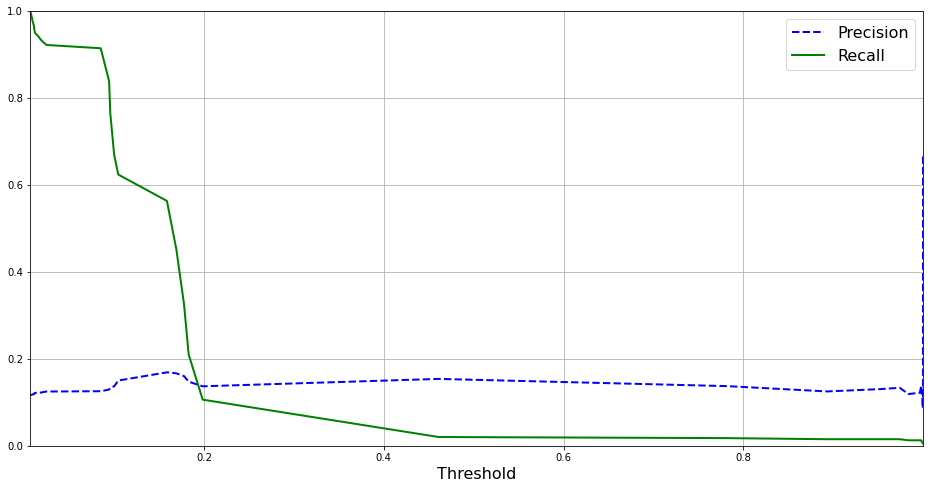

In [48]:
#Now let's generate a precision recall curve to figure out what decision threshold 
#will help us lead to an improved model
gnb = GaussianNB()
y_scores = cross_val_predict(gnb, X_train, y_train, cv = 5, method = "predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

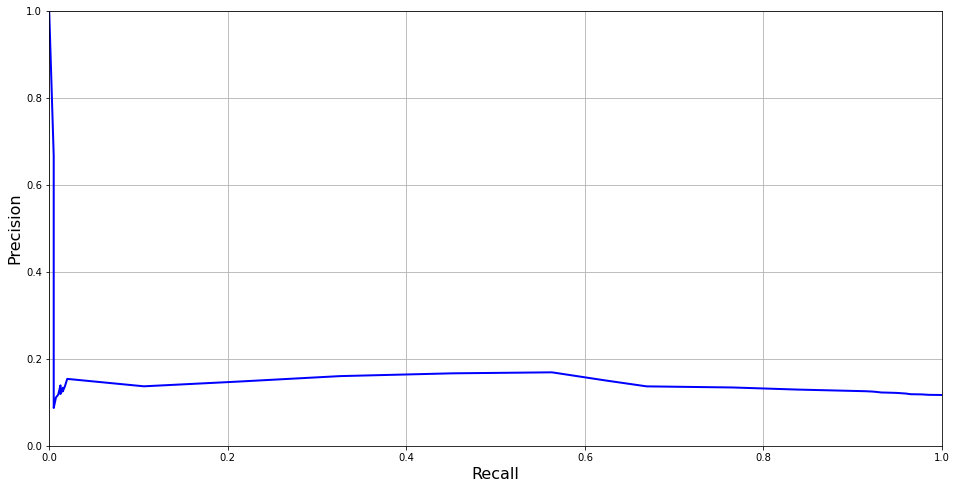

In [49]:
plt.figure(figsize = (16,8))
plot_precision_vs_recall(precisions, recalls)
plt.show()

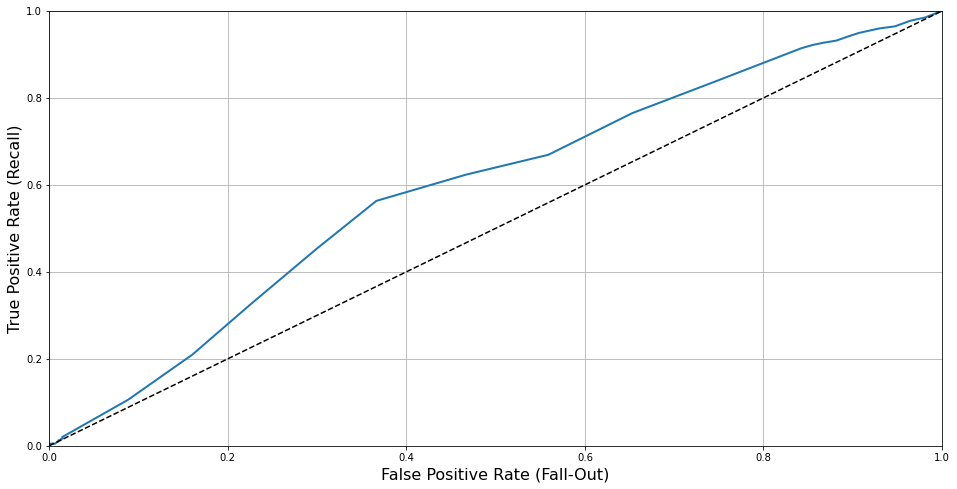

Area Under ROC Curve:  0.59231


In [50]:
#Now look at the ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores[:,1]),5))

Using the AUC ROC index for performance, it appears that the Naive Bayes model will slightly outperform the Logistic Regression classification model.

In [51]:
## Look at the test data
gnb = GaussianNB()
y_scores = cross_val_predict(gnb, X_test, y_test, cv = 5, method = "predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_test, y_scores[:,1]),5))

Area Under ROC Curve:  0.56632


In [52]:
#Use Naive Bayes on the test data:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("ROC AUC Test:", round(roc_auc_score(y_test, y_test_pred),5))

Confusion Matrix: 
 [[983  23]
 [124   1]]
ROC AUC Test: 0.49257


In [53]:
#Try cross-validating the method with roc_auc as the scoring method:
gnb = GaussianNB()
gnb_cross_val = cross_val_score(gnb, X_train, y_train, cv = 5, scoring = "roc_auc")
print(gnb_cross_val, "\n")
print("Naive Bayes Mean ROC AUC: ",round(gnb_cross_val.mean(),4))
print("Naive Bayes Std ROC AUC: ", round(gnb_cross_val.std(),5))

[0.59142875 0.62293696 0.63425329 0.56615456 0.61128763] 

Naive Bayes Mean ROC AUC:  0.6052
Naive Bayes Std ROC AUC:  0.02412


Neither of these models appear to be very good. I would lean towards the Naive Bayes model because this model has a better ROC AUC score in terms of average and standard deviation when compared to Logistic Regression AND this model actually makes some true positive predictions whereas the LogisticRegression model is simply just predicting every client to have a negative response. However, the Naive Bayes model appears to overfit the training even more so than Logistic Regression. I now need to explore how to better improve these classification methods:

In [54]:
#Try using all data instead of just test data:
X = bank_array[:,0:3]
y = bank_array[:,3]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4521, 3)
y shape: (4521,)


In [55]:
#Naive Bayes using all of the data:
gnb = GaussianNB()
gnb_cross_val = cross_val_score(gnb, X, y, cv = 5, scoring = "roc_auc")
print("Naive Bayes Mean ROC AUC: ",round(gnb_cross_val.mean(),4))
print("Naive Bayes Std ROC AUC: ", round(gnb_cross_val.std(),5))

Naive Bayes Mean ROC AUC:  0.6055
Naive Bayes Std ROC AUC:  0.03075


In [56]:
#Logistic Regression using all of the data:
logreg = LogisticRegression()
logreg_cross_val = cross_val_score(logreg, X, y, cv = 5, scoring = "roc_auc")
print("Logistic Regression Mean ROC AUC: ",round(logreg_cross_val.mean(),4))
print("Logistic Regression Std ROC AUC: ", round(logreg_cross_val.std(),5))

Logistic Regression Mean ROC AUC:  0.6064
Logistic Regression Std ROC AUC:  0.03417


This is discouraging as simply predicting no is leading to the best current model. It is tough to gain meaningful insights from these results. The marketers will not like to hear that their jobs are wasteful!

In [57]:
#Try logistic Regression with 'balanced' class_weights:
logreg_bal = LogisticRegression(class_weight = 'balance')
logreg_bal_cross_val = cross_val_score(logreg_bal, X, y, cv = 5, scoring = "roc_auc")
print("Logistic Regression Balanced Mean ROC AUC: ",round(logreg_bal_cross_val.mean(),4))
print("Logistic Regression Balanced Std ROC AUC: ", round(logreg_bal_cross_val.std(),5))

Logistic Regression Balanced Mean ROC AUC:  0.6064
Logistic Regression Balanced Std ROC AUC:  0.03417


In [58]:
logreg_bal = LogisticRegression(class_weight = 'balance')
logreg_bal.fit(X_train, y_train)
y_train_pred = logreg_bal.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[2994,    0],
       [ 396,    0]])

There was no improvement with introducing class weights.

In [59]:
#Try a different solver with Logistic Regression:
logreg_liblinear = LogisticRegression(solver = 'liblinear')
logreg_liblinear_cross_val = cross_val_score(logreg_liblinear, X, y, cv = 5, scoring = "roc_auc")
print("Logistic Regression Balanced Mean ROC AUC: ",round(logreg_bal_cross_val.mean(),4))
print("Logistic Regression Balanced Std ROC AUC: ", round(logreg_bal_cross_val.std(),5))

Logistic Regression Balanced Mean ROC AUC:  0.6064
Logistic Regression Balanced Std ROC AUC:  0.03417


In [60]:
logreg_liblinear = LogisticRegression(solver = 'liblinear')
logreg_liblinear.fit(X_train, y_train)
y_train_pred = logreg_liblinear.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[2994,    0],
       [ 396,    0]])

No improvement here with using liblinear solver. Instead of doing this manually, will try to replicate all possible parameter combinations with GridSearchCV later.

In [61]:
#The problem here with Logistic Regression is that it only predicts the negative response.
#Can use Precision / Recall curve to see the impact of changing the threshold via confusion matrix:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_scores = logreg.decision_function(X_train)
threshold = -1.25
y_thresh_predict = (y_scores > threshold)
confusion_matrix(y_train, y_thresh_predict)

array([[2985,    9],
       [ 392,    4]])

So clearly by changing our threshold, our precision will increase and the LogisticRegression algorithm will start to predict some True Positive results. But because there are no values identified with LogisticRegression with a threshold greater than zero, it will only produce negative responses without manually adjusting the threshold. 

This is still worth looking at for both the Naive Bayes and the LogisticRegression cases. I will now try to look at the best predictive examples of a positive response to see which of the three features, or combinations of, have a higher percentage of positive predictions compared to the make up in the test data set.

In [62]:
#Start with Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_scores = gnb.predict_proba(X_train)
y_scores_yes = y_scores[:,1]
threshold = 0.5
idx = np.where(y_scores_yes >= threshold)
positive_pred = len(idx[0])
default_sum = 0
housing_sum = 0
loan_sum = 0
for i in idx[0]:
    if X[i,0] == 1:
        default_sum += 1
    if X[i,1] == 1:
        housing_sum += 1
    if X[i,2] == 1:
        loan_sum += 1

model_list = [default_sum/positive_pred, housing_sum/positive_pred, loan_sum/positive_pred]
dataset_list = [df.default.sum()/len(df), df.housing.sum()/len(df), df.loan.sum()/len(df)]
compare = pd.DataFrame(list(zip(model_list,dataset_list)), 
                       columns = ['Model Percentages', 'Dataset Percentages'],
                       index = ['default', 'housing','loan'])
compare

Model Percentages  Dataset Percentages
default           0.019231             0.016810
housing           0.557692             0.566025
loan              0.153846             0.152842

In [63]:
#Now look at Logistic Regression with a threshold
threshold = -1.5
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_scores = logreg.decision_function(X_train)
idx = np.where(y_scores > threshold)
positive_pred = len(idx[0])
default_sum = 0
housing_sum = 0
loan_sum = 0
for i in idx[0]:
    if X[i,0] == 1:
        default_sum += 1
    if X[i,1] == 1:
        housing_sum += 1
    if X[i,2] == 1:
        loan_sum += 1

model_list = [default_sum/positive_pred, housing_sum/positive_pred, loan_sum/positive_pred]
dataset_list = [df.default.sum()/len(df), df.housing.sum()/len(df), df.loan.sum()/len(df)]
compare = pd.DataFrame(list(zip(model_list,dataset_list)), 
                       columns = ['Model Percentages', 'Dataset Percentages'],
                       index = ['default', 'housing','loan'])
compare

Model Percentages  Dataset Percentages
default           0.000000             0.016810
housing           0.384615             0.566025
loan              0.153846             0.152842

So the data from the Naive Bayes analysis is not very telling. But when looking at the top scoring predictions with Logistic Regerssion, it is clear that customers that responded with default = 0 and housing = 0 will lead to a higher chance of subscribing to a new term deposit loan. The key feature here is clearly the housing aspect. Let's see what a model would look like if we used the housing data alone:

In [64]:
#Try using just the housing data:
X = bank_array[:,0:3]
y = bank_array[:,3]
print("X shape:", X.shape)
print("y shape:", y.shape)
H = bank_array[:,1]
print("Housing Shape:", H.shape)

X shape: (4521, 3)
y shape: (4521,)
Housing Shape: (4521,)


In [65]:
#Split data into training and test data
H_train, H_test, y_train, y_test = train_test_split(H, y, random_state = seed)

In [66]:
logreg = LogisticRegression()
logreg.fit(H_train.reshape(-1,1), y_train)
logreg_cross_val = cross_val_score(logreg, H_train.reshape(-1,1), y_train, cv = 5, scoring = "roc_auc")
print(logreg_cross_val, "\n")
print("Logistic Regression Just Housing Mean ROC AUC: ",round(logreg_cross_val.mean(),4))
print("Logistic Regression Just Housing Std ROC AUC: ", round(logreg_cross_val.std(),5))

[0.55978318 0.63274233 0.62794531 0.52264322 0.58599498] 

Logistic Regression Just Housing Mean ROC AUC:  0.5858
Logistic Regression Just Housing Std ROC AUC:  0.04158


In [67]:
logreg = LogisticRegression()
logreg.fit(H_train.reshape(-1,1), y_train)
housing_pred = logreg.predict(H_train.reshape(-1,1))
confusion_matrix(y_train, housing_pred)

array([[2994,    0],
       [ 396,    0]])

In [68]:
#Use Just Housing data on the test data:
logreg = logreg = LogisticRegression()
logreg.fit(H_train.reshape(-1,1), y_train)
y_test_pred = gnb.predict(H_test.reshape(-1,1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("ROC AUC Test:", round(roc_auc_score(y_test, y_test_pred),5))

Confusion Matrix: 
 [[398 608]
 [ 66  59]]
ROC AUC Test: 0.43381


This is still just predicting everything with a score of 0, but this is just as effective of including all three features with normal Logistic Regression.

In [69]:
#One thing to look at is how the data is being split, need to ensure it stays stratified:

In [70]:
X = bank_array[:,0:3]
y = bank_array[:,3]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4521, 3)
y shape: (4521,)


In [71]:
#Stratify Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

In [72]:
yes_train = y_train.sum()/len(y_train)
yes_test = y_test.sum()/len(y_test)
print("Proportion response yes in train:", yes_train)
print("Proportion respons yes in test:", yes_test)

Proportion response yes in train: 0.11533923303834809
Proportion respons yes in test: 0.11494252873563218


In [73]:
plt.bar(['train','test'], [yes_train, yes_test])
plt.show()

In [74]:
#Compare to not stratifying:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)
yes_train = y_train.sum()/len(y_train)
yes_test = y_test.sum()/len(y_test)
print("Proportion response yes in train:", yes_train)
print("Proportion respons yes in test:", yes_test)

Proportion response yes in train: 0.1168141592920354
Proportion respons yes in test: 0.11052166224580018


In [75]:
plt.bar(['train','test'], [yes_train, yes_test])
plt.show()

So not a huge difference, but one to consider and probably a best practice moving forward. Want to ensure that training data and test data have reprsentative proportions, especially when the response positive class is such a low minority.

In [76]:
#Stratify Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

In [77]:
#With stratified split, look at Logistic Regression Performance:
logreg = LogisticRegression(class_weight = "balanced")
logreg_bal_cross_val = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "roc_auc")
print(logreg_bal_cross_val, "\n")
print("Logistic Regression Balanced Mean ROC AUC: ",round(logreg_bal_cross_val.mean(),4))
print("Logistic Regression Balanced Std ROC AUC: ", round(logreg_bal_cross_val.std(),5))

[0.58699786 0.64232906 0.58877137 0.58858974 0.61255045] 

Logistic Regression Balanced Mean ROC AUC:  0.6038
Logistic Regression Balanced Std ROC AUC:  0.02145


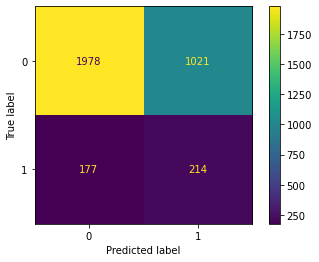

In [78]:
logreg = LogisticRegression(class_weight = "balanced")
logreg.fit(X_train, y_train)
plot_confusion_matrix(logreg, X_train, y_train)
plt.show()

This is clearly a big step up with regards the the confusion matrix by using Logisitc Regression. Clearly stratifying the split of the data along with balancing the class weights helps to improve the output!

In [79]:
logreg = LogisticRegression(class_weight = "balanced")
y_scores = cross_val_predict(logreg, X_train, y_train, cv = 5, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

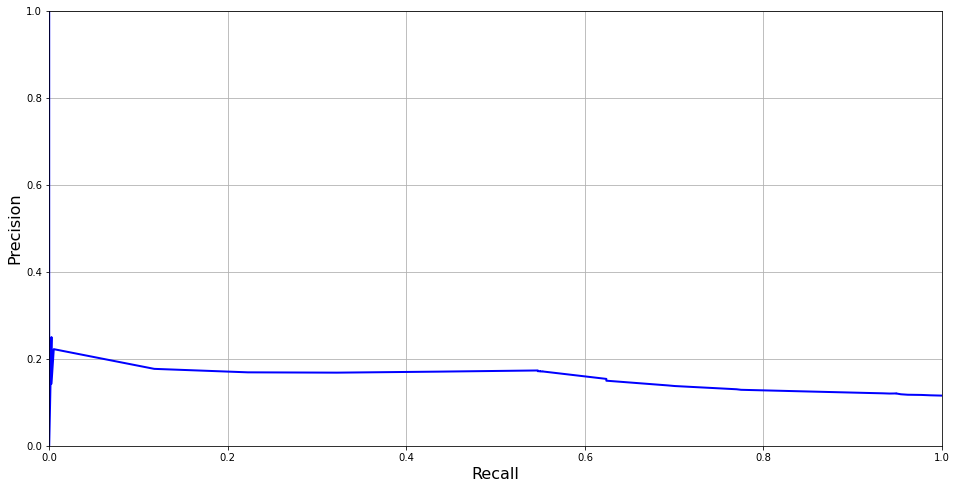

In [80]:
plt.figure(figsize = (16,8))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [81]:
#Now look at the ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores),5))

Area Under ROC Curve:  0.60182


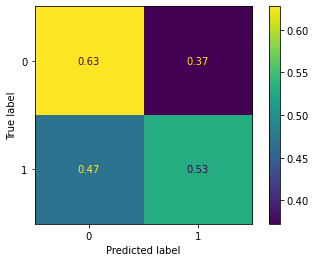

Precision:  0.15610859728506787
Recall:  0.5307692307692308
ROC AUC:  0.579070929070929


In [82]:
#Look at the performance on the test data now:
logreg = LogisticRegression(class_weight = "balanced")
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
plot_confusion_matrix(logreg, X_test, y_test, normalize = 'true')
plt.show();

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Using a stratified split in the test data with balanced class weights for the Logistic Regression model has led to a clear model performance improvement. The model is doing a far better job from overfitting the training data. Most likely because the data in the training set and test set are similar. Also, we can see from cross-validating this model with this test data that the ROC AUC score is similar to other models while the standard deviation is improved. But more importantly, the Precision and Recall are greatly improved.

In [83]:
#With stratified split, look at Naive Bayes Performance:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

gnb = gnb = GaussianNB()
gnb_bal_cross_val = cross_val_score(gnb, X_train, y_train, cv = 5, scoring = "roc_auc")
print(gnb_bal_cross_val, "\n")
print("Naive Bayes Stratified Mean ROC AUC: ",round(gnb_bal_cross_val.mean(),4))
print("Naive Bayes Stratified Std ROC AUC: ", round(gnb_bal_cross_val.std(),5))

[0.57915598 0.63350427 0.59612179 0.60867521 0.61455802] 

Naive Bayes Stratified Mean ROC AUC:  0.6064
Naive Bayes Stratified Std ROC AUC:  0.01819


In [84]:
#Now compare with the Naive Bayes:
#Stratify Split the data:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test, normalize = 'true')
plt.show();

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Precision:  0.3333333333333333
Recall:  0.007692307692307693
ROC AUC:  0.5028471528471528


In [85]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_train_pred = gnb.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[2988,   11],
       [ 388,    3]])

Interesting note that stratifying the split seemed to greatly improve the Logistic Regression model, but hurt the Gaussian NB model. The Naive Bayes model was still badly overfitting the data even with the stratified split of the data. It appears with the stratified split that the Naive Bayes model was less likely to predict a positive response. This is likely because the non-stratified training data had a higher proportion of positive responses compared to the test data. It is clear from this work that the class_weight balanced LogisticRegression model is superior to the Naive Bayes model. 

### Fine-tune your models and combine them into a great solution:

In [86]:
#Look into hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(class_weight = 'balanced')

param_grid = [{'penalty':['l1','l2','elasticnet','none'],
               'C': [0.001,0.01,0.1,1,10,100,1000],
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000, 2500, 5000]}]

grid = GridSearchCV(logreg, param_grid, cv = 3, scoring = 'roc_auc', verbose = True, n_jobs = -1)
best_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:    2.4s finished


In [87]:
best_grid.best_estimator_

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [88]:
best_grid.best_score_

0.6058393321487469

In [89]:
best_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
best_grid.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

From this, we can see that the best model with Logistic Regression. Will reconduct my efforts with this Model:

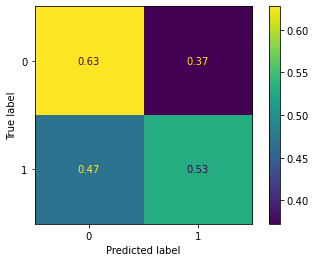

Precision:  0.15610859728506787
Recall:  0.5307692307692308
ROC AUC:  0.579070929070929


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

logreg = LogisticRegression(C = 1, class_weight = 'balanced', penalty = 'l1', solver = 'liblinear')
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
plot_confusion_matrix(logreg, X_test, y_test, normalize = 'true')
plt.show();

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_test_pred))

In [92]:
logreg = LogisticRegression(C = 1, class_weight = 'balanced', penalty = 'l1', solver = 'liblinear')
logreg_bal_cross_val = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "roc_auc")
print(logreg_bal_cross_val,"\n")
print("Logistic Regression Balanced Mean ROC AUC: ",round(logreg_bal_cross_val.mean(),4))
print("Logistic Regression Balanced Std ROC AUC: ", round(logreg_bal_cross_val.std(),5))

[0.5878312  0.64232906 0.58877137 0.58858974 0.61255045] 

Logistic Regression Balanced Mean ROC AUC:  0.604
Logistic Regression Balanced Std ROC AUC:  0.02132


So the default was essentially the same as we got above. No improvement with GridSearch, but no deterioration either. We can see a slight improvement of this model based on the cross-validated mean and standard deviation ROC AUC score for the training data. Also, the model doesn't seem to drastically overfit the training data like was shown above. 

Out of curiosity, I want to look at the performance of some other classifiers:

### Explore many different models and shortlist the best ones:

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

### Decision Tree

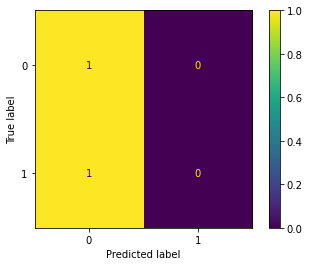

In [94]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_train, y_train, normalize = 'true')
plt.show()

In [95]:
clf = DecisionTreeClassifier()
clf_cross = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "roc_auc")
print("Logistic Regression Balanced Mean ROC AUC: ",round(clf_cross.mean(),4))
print("Logistic Regression Balanced Std ROC AUC: ", round(clf_cross.std(),5))

Logistic Regression Balanced Mean ROC AUC:  0.6077
Logistic Regression Balanced Std ROC AUC:  0.01686


### K-Nearest Neighbors

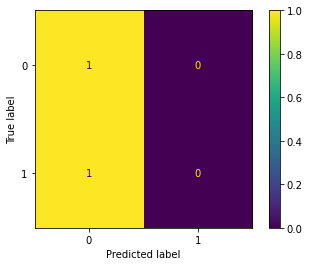

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
plot_confusion_matrix(knn, X_train, y_train, normalize = "true")
plt.show();

### Support Vector Machine

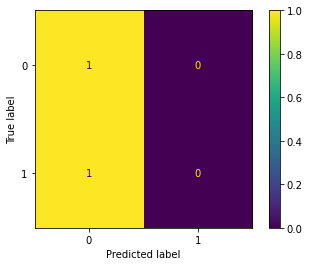

In [97]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
plot_confusion_matrix(svm, X_train, y_train, normalize = "true")
plt.show();

I think the only thing left to do to try to improve this model is to start adding back in features:

### Try adding features to see the impact on model performance:

In [98]:
bank = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 3/jump-start-bank-v003/bank.csv", sep = ";")

In [99]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome response  
0  cellular   19   oct        79         1     -1         0  unknown       no  
1  cellular   11   may       220         1    339         4  failure       no  
2  cellular   16   apr       185         1    330         1  failure       no  
3   unknown    3   jun       199         4     -1         0  unknown       no  
4   unknown    5   may       226         1     -1         0  unknown       no

In [100]:
#For the sake of the assignment, I just want to keep looking at categorical variables. 
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [101]:
#So I will drop any numeric variables:
cat = bank.drop(columns = ['age','balance','day','month', 'duration','campaign','pdays', 'previous','response'])
cat.head()

job  marital  education default housing loan   contact poutcome
0   unemployed  married    primary      no      no   no  cellular  unknown
1     services  married  secondary      no     yes  yes  cellular  failure
2   management   single   tertiary      no     yes   no  cellular  failure
3   management  married   tertiary      no     yes  yes   unknown  unknown
4  blue-collar  married  secondary      no     yes   no   unknown  unknown

In [102]:
y = bank['response']
convert_to_binary = {'no' : 0, 'yes' : 1}
y = y.map(convert_to_binary)
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: response, Length: 4521, dtype: int64

In [103]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X = cat_encoder.fit_transform(cat)
print("One Hot Shape: \n", X.shape)
print(X[0,:])

One Hot Shape: 
 (4521, 32)
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 15)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 23)	1.0
  (0, 25)	1.0
  (0, 31)	1.0


In [104]:
#Stratify Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)

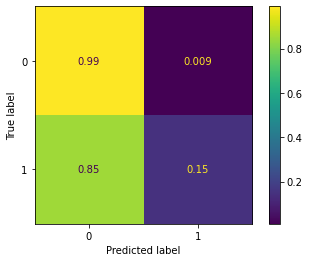

In [105]:
#Look at the default Logistic Regression model with expanded features:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
plot_confusion_matrix(logreg, X_train, y_train, normalize = "true")
plt.show();

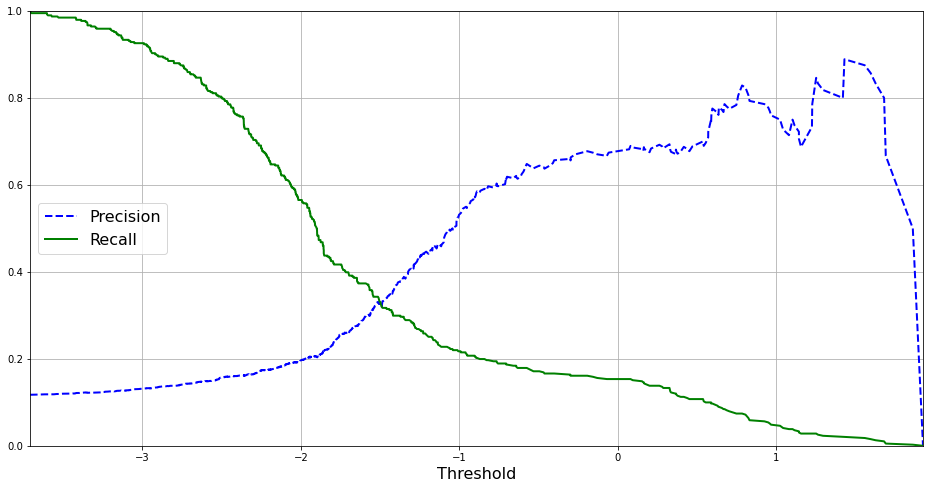

In [106]:
#Now consider the Precision / Recall Curve:
logreg = LogisticRegression()
y_scores = cross_val_predict(logreg, X_train, y_train, cv = 5, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

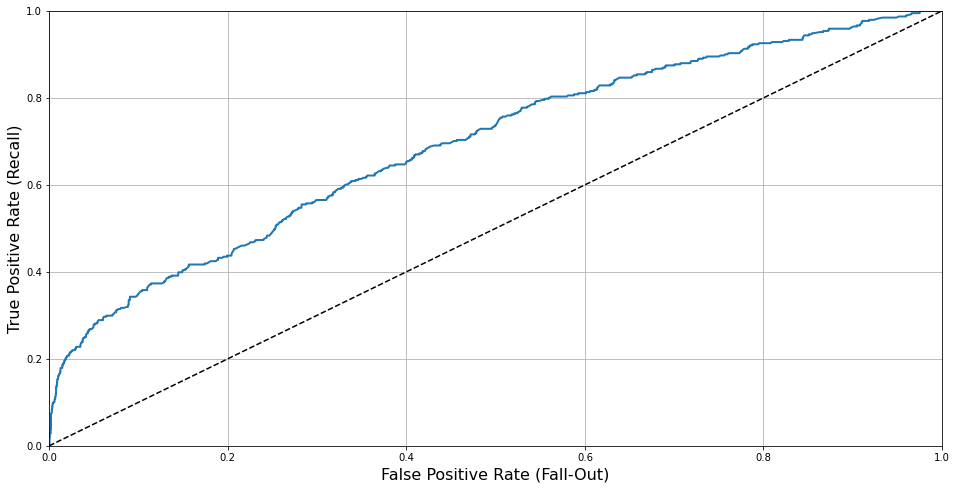

Area Under ROC Curve:  0.69269


In [107]:
#Now look at the ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores),5))

So it is clear that expanding the number of features will greatly impact the performance of the model!

In [108]:
#Now let's optimize the Logistic Regression Model:
logreg = LogisticRegression(class_weight = 'balanced')

param_grid = [{'penalty':['l1','l2','elasticnet','none'],
               'C': [0.001,0.01,0.1,1,10,100,1000],
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}]

grid = GridSearchCV(logreg, param_grid, cv = 3, scoring = 'roc_auc', verbose = True, n_jobs = -1)
best_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    1.9s finished


In [109]:
best_grid.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', solver='saga')

In [110]:
best_grid.best_score_

0.6986523482476409

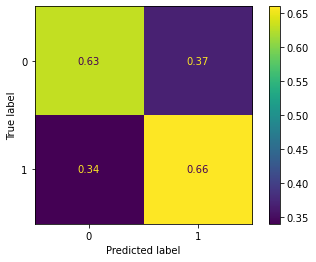

In [111]:
#Look at the best estimate Confusion Matrix:
logreg = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'saga')
logreg.fit(X_train, y_train)
plot_confusion_matrix(logreg, X_train, y_train, normalize = "true")
plt.show();

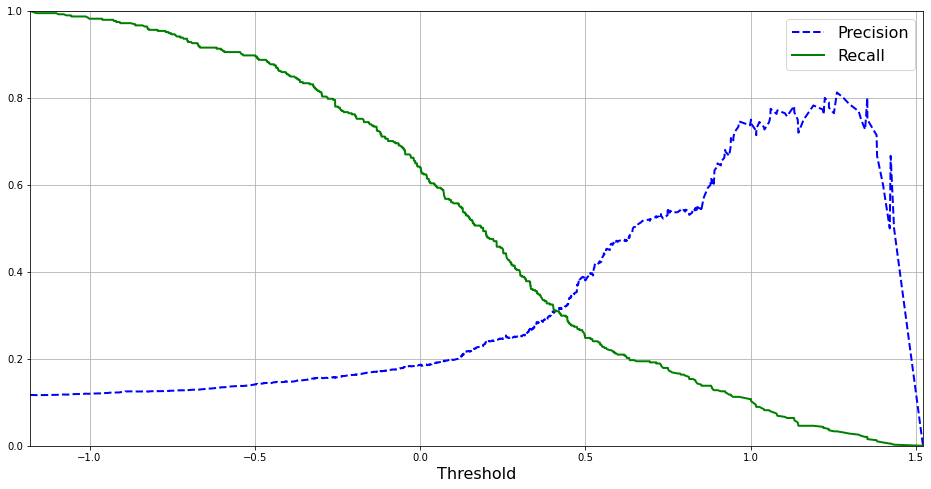

In [112]:
#Now consider the Best Estimate Precision / Recall Curve:
logreg = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'saga')
y_scores = cross_val_predict(logreg, X_train, y_train, cv = 5, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

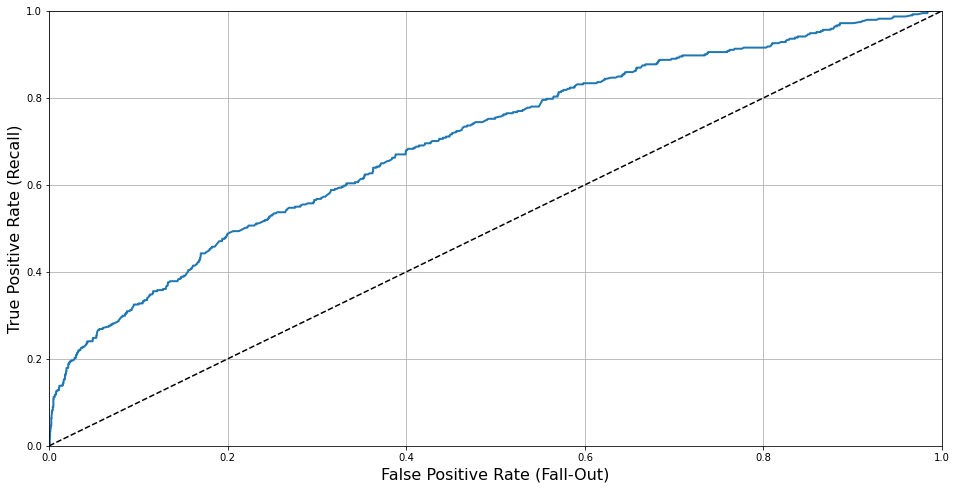

Area Under ROC Curve:  0.69865


In [113]:
#Now look at the best estimate ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores),5))

In [114]:
#Cross validate best estimate:
logreg = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'saga')
logreg_cross_val = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "roc_auc")
print(logreg_cross_val, "\n")
print("Logistic Regression Mean ROC AUC: ",round(logreg_cross_val.mean(),4))
print("Logistic Regression Std ROC AUC: ", round(logreg_cross_val.std(),5))

[0.73432692 0.69793803 0.66292735 0.70106838 0.7034192 ] 

Logistic Regression Mean ROC AUC:  0.6999
Logistic Regression Std ROC AUC:  0.02267


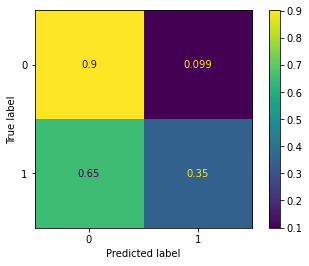

In [115]:
#Now consider the added features with Naive Bayes:
gnb = gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
plot_confusion_matrix(gnb, X_train.toarray(), y_train, normalize = "true")
plt.show();

In [116]:
gnb = GaussianNB()
y_scores = cross_val_predict(gnb, X_train.toarray(), y_train, cv = 5, method = "predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])
plt.figure(figsize = (16,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

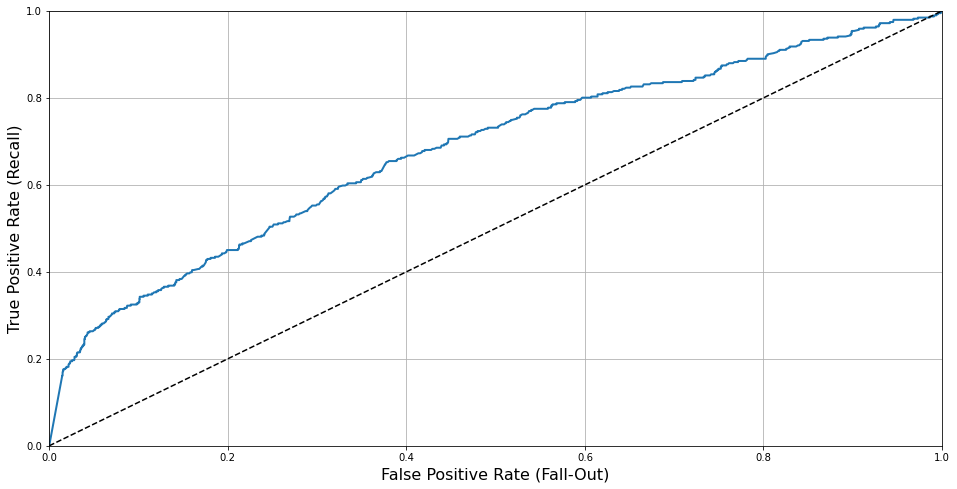

Area Under ROC Curve:  0.68019


In [117]:
#Now look at the best estimate ROC curve:
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])
plt.figure(figsize = (16,8))
plot_roc_curve(fpr, tpr)
plt.show();

print("Area Under ROC Curve: ",round(roc_auc_score(y_train, y_scores[:,1]),5))

In [118]:
#Cross-validate the Naive Bayes with the added features:
gnb = GaussianNB()
gnb_cross_val = cross_val_score(gnb, X_train.toarray(), y_train, cv = 5, scoring = "roc_auc")
print(gnb_cross_val, "\n")
print("Naive Bayes Mean ROC AUC: ",round(gnb_cross_val.mean(),4))
print("Naive Bayes Std ROC AUC: ", round(gnb_cross_val.std(),5))

[0.68244658 0.68904915 0.65471154 0.7209188  0.66066862] 

Naive Bayes Mean ROC AUC:  0.6816
Naive Bayes Std ROC AUC:  0.02351


In [119]:
#Cross validate best estimate:
logreg = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'saga')
logreg_cross_val = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "roc_auc")
print(logreg_cross_val, "\n")
print("Logistic Regression Mean ROC AUC: ",round(logreg_cross_val.mean(),4))
print("Logistic Regression Std ROC AUC: ", round(logreg_cross_val.std(),5))

[0.73434829 0.69800214 0.66292735 0.70102564 0.70352486] 

Logistic Regression Mean ROC AUC:  0.7
Logistic Regression Std ROC AUC:  0.02268


In [120]:
#Looks like Logistic Regression is best, now let's test the model:
#Look at the best estimate Confusion Matrix:
logreg = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'saga')
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
plot_confusion_matrix(logreg, X_test, y_test)
plt.show();

print(classification_report(y_test, y_test_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_test_pred),5))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1001
           1       0.19      0.65      0.29       130

    accuracy                           0.64      1131
   macro avg       0.56      0.64      0.52      1131
weighted avg       0.85      0.64      0.70      1131

ROC AUC: 0.64461


Clearly adding more features will help improve the metrics of this classification model across the board. The ROC AUC, Precision, and Recall scores all increase with the additional features. Expanding the feature selection and improving the features engineering I believe will help better predictive positive responses and allow for a more informed and successful marketing campaign.